In [21]:
PSDS_PATH = '.'

## 🔪 Murder rate by state

In [8]:
file_path = './data/state.csv'

In [9]:
state <- read.csv(file_path)

In [6]:
mean(state[['Population']]) # double bracket -> dataframe에서 value만 꺼내줌

[1] 6162876

In [14]:
class(state['Population'])

[1] "data.frame"

In [15]:
class(state[['Population']])

[1] "integer"

In [16]:
state[['Population']]

[1]  4779736   710231  6392017  2915918 37253956  5029196  3574097   897934
 [9] 18801310  9687653  1360301  1567582 12830632  6483802  3046355  2853118
[17]  4339367  4533372  1328361  5773552  6547629  9883640  5303925  2967297
[25]  5988927   989415  1826341  2700551  1316470  8791894  2059179 19378102
[33]  9535483   672591 11536504  3751351  3831074 12702379  1052567  4625364
[41]   814180  6346105 25145561  2763885   625741  8001024  6724540  1852994
[49]  5686986   563626

In [17]:
median(state[['Population']]) # 중간값

[1] 4436370

In [18]:
mean(state[['Population']], trim=0.1) # 절사평균 

[1] 4783697

In [19]:
install.packages("matrixStats") # 패키지 설치

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [21]:
weighted.mean(state[['Murder.Rate']], w=state[['Population']]) # 가중치가 인구 -> 미국 전체의 평균 살인율 (가중 평균)

[1] 4.445834

In [22]:
library('matrixStats') # 패키지 불러오기 

In [23]:
weightedMedian(state[['Murder.Rate']], w=state[['Population']])

[1] 4.4

In [4]:
arr = c(3, 1, 5, 3, 6, 7, 2, 9)
arr

[1] 3 1 5 3 6 7 2 9

In [5]:
quantile(arr, 0.25)

25% 
2.75

In [7]:
arr = c(3, 1, 5, 3, 6, 7, 2)
quantile(arr, 0.5)

50% 
  3

In [12]:
sd(state[['Population']]) # 표준편차

[1] 6848235

In [13]:
IQR(state[['Population']]) # 사분위범위

[1] 4847308

In [14]:
mad(state[['Population']]) # 중간값의 중위절대편차

[1] 3849870

In [16]:
# 주별 살인율의 백분위수 
quantile(state[['Murder.Rate']], p =c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

In [17]:
# 도수분포표
## 구간 만들기
breaks <- seq(from=min(state[['Population']]), to=max(state[['Population']]), length=11) 
## 구간마다 빈도 세기 
### breaks: 경계값 벡터 
### right: 각 구간의 오른쪽 상한 포함 여부 (첫번째 구간 왼쪽 괄호가 bracket)
### lowest: 가장 작은 값이 포함된 첫 구간을 포함할지 여부 
pop_freq <- cut(state[['Population']], breaks=breaks, right=TRUE, include.lowest=TRUE)
table(pop_freq) # 얼핏 보면 10개의 bin이지만, 각 bin마다 범위는 두 개의 숫자로 표현 -> 총 11개 숫자로 구간 설정 

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

In [18]:
breaks

[1]   563626  4232659  7901692 11570725 15239758 18908791 22577824 26246857
 [9] 29915890 33584923 37253956

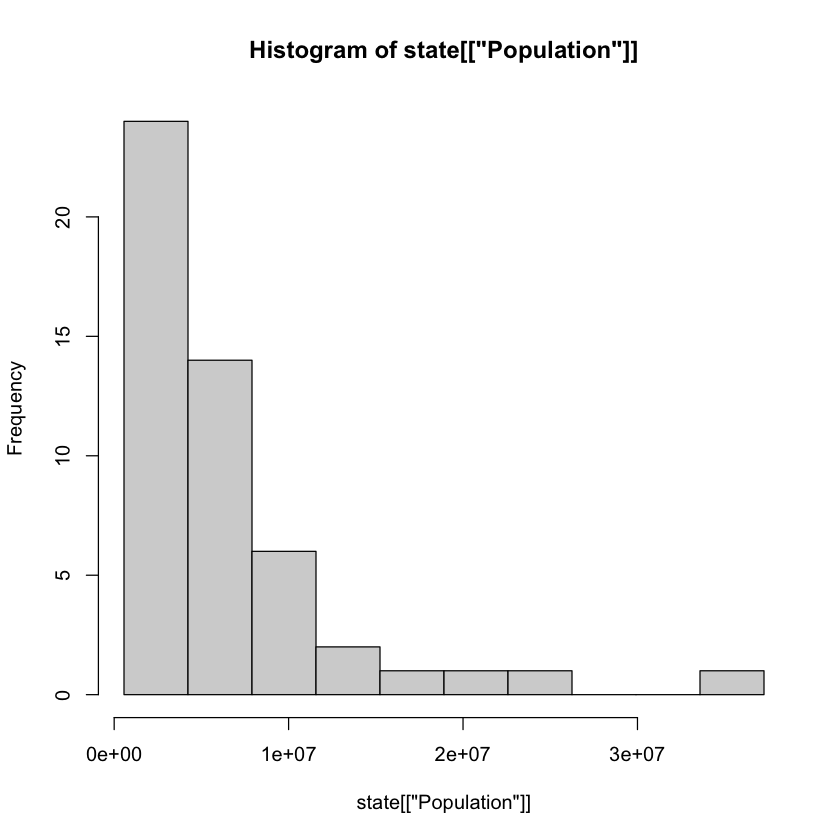

In [19]:
# 히스토그램
hist(state[['Population']], breaks=breaks)

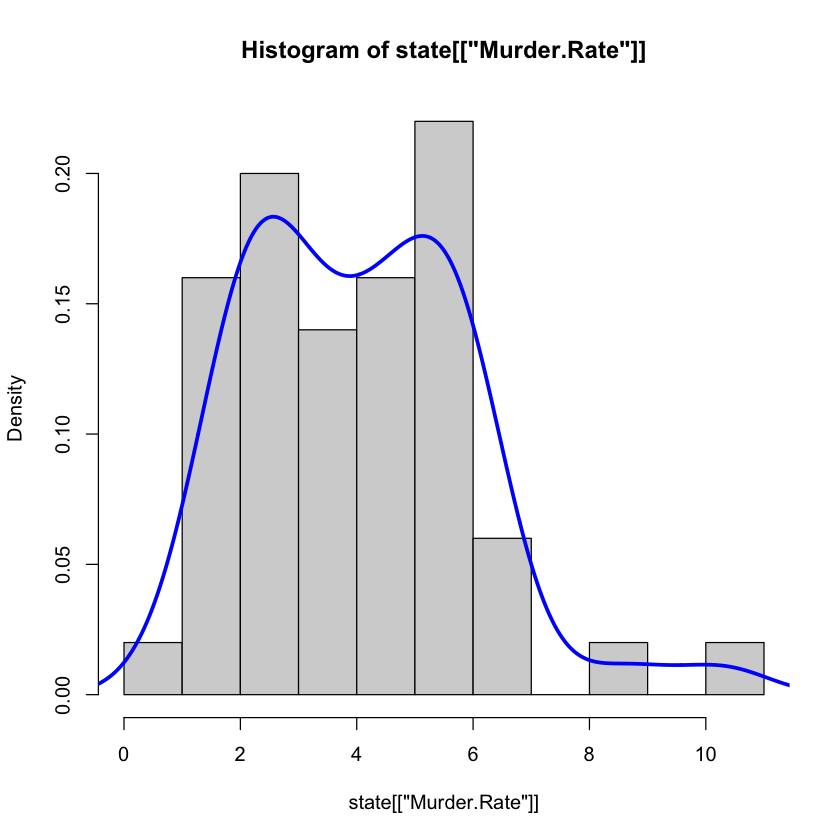

In [21]:
# 밀도 그림 
hist(state[['Murder.Rate']], freq=FALSE) # freq=FALSE: 빈도수 대신 확률 밀도로 히스토그램을 표시.
## density: 데이터의 밀도 추정치
lines(density(state[['Murder.Rate']]), lwd=3, col='blue') # lwd: 선 두께 

## 🛫 DFW airline

In [23]:
file_path = './data/dfw_airline.csv'
dfw <- read.csv(file_path)

In [26]:
dfw/sum(dfw)*100

Carrier,ATC,Weather,Security,Inbound
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23.02299,30.40078,4.025214,0.1229373,42.42808


In [28]:
as.matrix(dfw)

Carrier,ATC,Weather,Security,Inbound
64263.16,84856.5,11235.42,343.15,118427.8


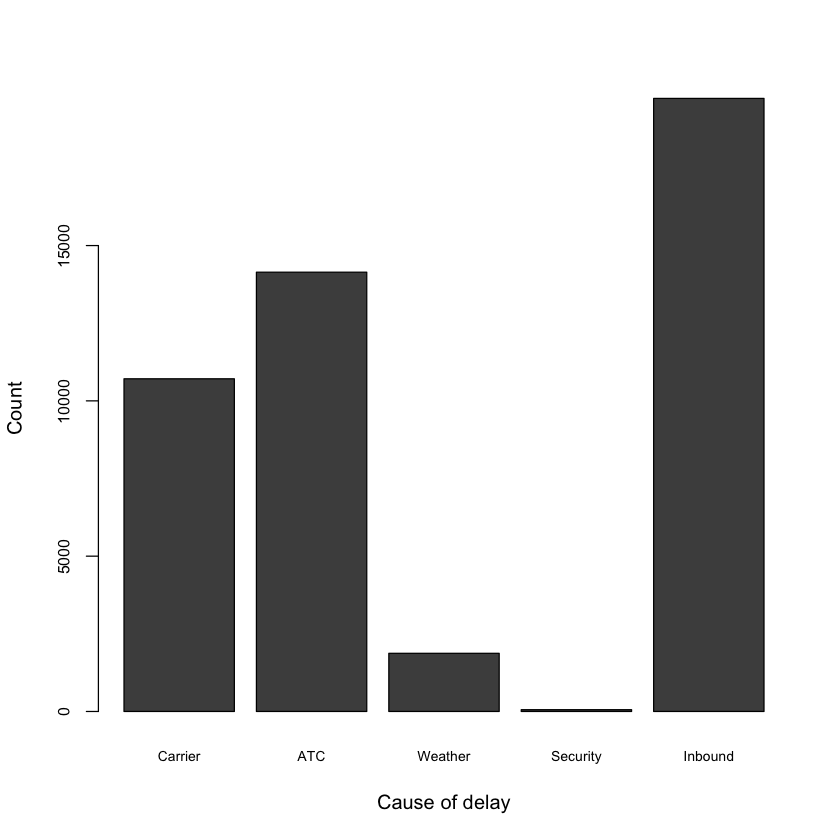

In [27]:
# bar plot
## cex.axis: 축 텍스트의 확대/축소, cex.names: 축 이름의 확대/축소 비율
barplot(as.matrix(dfw)/6, cex.axis=0.8, cex.names=0.7, xlab='Cause of delay', ylab='Count')

## 💹 SP 500

In [12]:
# 상관관계
PSDS_PATH = '.'
# row.names=1: first col is row name
sp500_px <- read.csv(file.path(PSDS_PATH, 'data', 'sp500_data.csv.gz'), row.names=1)
# stringsAsFactors: 기본적으로 문자열을 카테고리(factor)로 인식하는 기능을 비활성화
sp500_sym <- read.csv(file.path(PSDS_PATH, 'data', 'sp500_sectors.csv'), stringsAsFactors = FALSE)

In [50]:
head(sp500_sym, 5)

,sector,sector_label,sub_sector,symbol
,<chr>,<chr>,<chr>,<chr>
1,information_technology,Technology,data_processing_&_outsourced_services,ADS
2,information_technology,Technology,systems_software,CA
3,information_technology,Technology,systems_software,MSFT
4,information_technology,Technology,systems_software,RHT
5,information_technology,Technology,it_consulting_&_services,CTSH


In [45]:
head(sp500_px, 5)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,⋯,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1993-01-29,0,0.06012444,-0.02209982,0,0,0.01889746,0.007368072,0.0921652,0.25914009,-0.007105265,⋯,0,0,0.34716010,0,0.04167,0.00000000,0.015563612,1.75,0.1250,0
1993-02-01,0,-0.18038896,0.02762115,0,0,0.01888884,0.018424887,0.1152065,-0.10077451,0.063892875,⋯,0,0,-0.23144007,0,0.00000,-0.01040992,0.007781806,1.25,0.1250,0
1993-02-02,0,-0.12025659,0.03589987,0,0,-0.07557260,0.029481717,-0.0230413,0.02879553,-0.014192369,⋯,0,0,-0.11572003,0,0.00000,0.00000000,-0.007791776,-0.25,0.0000,0
1993-02-03,0,0.06012420,-0.02485703,0,0,-0.15112797,0.003688752,-0.2534543,-0.04319002,-0.007105265,⋯,0,0,-0.08679003,0,0.04167,-0.04166996,-0.038918978,-0.50,0.0625,0
1993-02-04,0,-0.36076975,-0.06075672,0,0,0.11335029,-0.022113634,0.0698618,0.00000000,-0.007096184,⋯,0,0,0.14465004,0,-0.04166,-0.03126000,-0.046710803,0.00,0.0625,0


In [46]:
# first row is part of data
test_sp500_px <- read.csv(file.path(PSDS_PATH, 'data', 'sp500_data.csv.gz'))
head(test_sp500_px, 5)

,X,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,⋯,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1993-01-29,0,0.06012444,-0.02209982,0,0,0.01889746,0.007368072,0.0921652,0.25914009,⋯,0,0,0.34716010,0,0.04167,0.00000000,0.015563612,1.75,0.1250,0
2,1993-02-01,0,-0.18038896,0.02762115,0,0,0.01888884,0.018424887,0.1152065,-0.10077451,⋯,0,0,-0.23144007,0,0.00000,-0.01040992,0.007781806,1.25,0.1250,0
3,1993-02-02,0,-0.12025659,0.03589987,0,0,-0.07557260,0.029481717,-0.0230413,0.02879553,⋯,0,0,-0.11572003,0,0.00000,0.00000000,-0.007791776,-0.25,0.0000,0
4,1993-02-03,0,0.06012420,-0.02485703,0,0,-0.15112797,0.003688752,-0.2534543,-0.04319002,⋯,0,0,-0.08679003,0,0.04167,-0.04166996,-0.038918978,-0.50,0.0625,0
5,1993-02-04,0,-0.36076975,-0.06075672,0,0,0.11335029,-0.022113634,0.0698618,0.00000000,⋯,0,0,0.14465004,0,-0.04166,-0.03126000,-0.046710803,0.00,0.0625,0


In [48]:
etfs <- sp500_px[row.names(sp500_px) > "2012-07-01",
        sp500_sym[sp500_sym$sector=="etf", 'symbol']]

In [49]:
etfs

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012-07-02,-0.37609833,0.09631320,0.028222544,-0.24279642,0.419998,-10.40,0.000000,0.534640942,0.02818614,0.09575859,0.09831142,-0.093712623,0.01907609,-0.009528550,0.313499475,0.018998601,0.075667913
2012-07-03,0.37609928,0.48157564,0.874935569,0.72840513,0.490006,-3.52,0.250000,0.926067176,0.99594157,0.00000000,-0.04468612,0.337373133,0.00000000,0.000000000,0.129087096,0.104492320,0.236462217
2012-07-05,0.15044046,0.09631320,-0.103487054,0.14942036,0.239991,6.56,-0.070000,-0.171848297,-0.46038708,0.30643057,-0.15193762,0.103085950,0.01907227,-0.142954937,-0.073766425,-0.142489524,0.066211313
2012-07-06,-0.14103982,-0.49120137,0.018819420,-0.20544880,-0.519989,-8.80,-0.180000,-0.229127876,0.20670618,0.15321433,0.08043661,0.018743837,-0.42921292,-0.095303607,0.119864678,0.066495109,-0.227002783
2012-07-09,0.24446481,-0.04816045,-0.056445089,-0.16809371,0.429992,-0.48,0.459999,-0.190938624,-0.23489232,-0.20109793,-0.03575050,-0.168687038,0.00000000,0.352629732,-0.064547697,0.018998602,0.009456597
2012-07-10,-0.73340007,-0.94388728,-1.759260159,-1.50350576,-2.980011,9.92,-0.630002,-1.412963190,-1.34358410,-0.45964586,0.01787480,-0.656002428,0.00000000,-0.381215384,-0.082985154,-0.208984628,-0.406715967
2012-07-11,-0.24446388,-0.26005181,-0.047041965,-0.48560030,0.410003,-6.88,0.380001,-0.315054409,0.50736085,-0.22982101,0.10724793,-0.215543353,0.00000000,0.000000000,-0.110645949,0.104492317,-0.104044325
2012-07-12,0.06581770,-0.08668361,0.122292361,0.33618835,1.330001,-3.84,0.360001,0.334146649,0.52616350,0.13406242,0.07149743,0.215542414,0.00000000,0.123893070,0.082986076,-0.018998604,-0.075667908
2012-07-13,0.55474922,0.75126089,1.778078633,1.58755633,0.690002,-9.92,0.290001,0.668292347,0.82681910,0.61286018,0.22343504,0.477945822,0.00000000,0.390748699,0.267397529,0.313476938,0.293214100


In [54]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [55]:
library(corrplot)

corrplot 0.92 loaded



In [60]:
cor(etfs) # 상관행렬 

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.00000000,0.78586517,0.88886508,0.86967996,0.05655353,-0.4681964,0.23688051,0.78237977,0.6500538,0.79808026,0.3808086,0.7841440,0.37400039,0.66302216,0.60042443,0.78734034,0.77777299
QQQ,0.78586517,1.00000000,0.90899509,0.83444023,0.04355338,-0.4705547,0.19949159,0.81015829,0.5600437,0.83970092,0.3466674,0.7134629,0.42178967,0.77539202,0.61480596,0.75277087,0.94512616
SPY,0.88886508,0.90899509,1.00000000,0.95372636,0.07872233,-0.5470743,0.27206877,0.83393714,0.7132996,0.88702823,0.4819276,0.8260525,0.40618147,0.81126894,0.74446588,0.88361638,0.88658753
DIA,0.86967996,0.83444023,0.95372636,1.00000000,0.05152317,-0.5113267,0.25679320,0.75801156,0.6583112,0.84704330,0.4633636,0.7874147,0.38392847,0.77104369,0.75372527,0.86055586,0.84275704
GLD,0.05655353,0.04355338,0.07872233,0.05152317,1.00000000,-0.1074884,0.21656278,0.07010968,0.1886248,0.01746678,0.1216112,0.1843656,-0.04223261,-0.01020037,0.03304741,0.04303877,0.05302189
VXX,-0.46819642,-0.47055473,-0.54707432,-0.51132672,-0.10748837,1.0000000,-0.19539697,-0.44894198,-0.4484739,-0.47475567,-0.2603946,-0.4708898,-0.20566070,-0.38092476,-0.41691283,-0.51436468,-0.47725755
USO,0.23688051,0.19949159,0.27206877,0.25679320,0.21656278,-0.1953970,1.00000000,0.24979886,0.5259432,0.18327524,0.1131819,0.3241657,0.07879595,0.11950044,0.11685677,0.22176039,0.22596230
IWM,0.78237977,0.81015829,0.83393714,0.75801156,0.07010968,-0.4489420,0.24979886,1.00000000,0.5869908,0.77975022,0.3250030,0.7015327,0.38727446,0.66428781,0.53706478,0.75628160,0.76043797
XLE,0.65005383,0.56004366,0.71329959,0.65831124,0.18862477,-0.4484739,0.52594323,0.58699080,1.0000000,0.57895562,0.3379420,0.6897776,0.26046280,0.45445659,0.41348550,0.59912854,0.55932433
XLY,0.79808026,0.83970092,0.88702823,0.84704330,0.01746678,-0.4747557,0.18327524,0.77975022,0.5789556,1.00000000,0.3668268,0.7212324,0.37029878,0.70285993,0.66305548,0.78205282,0.77218928


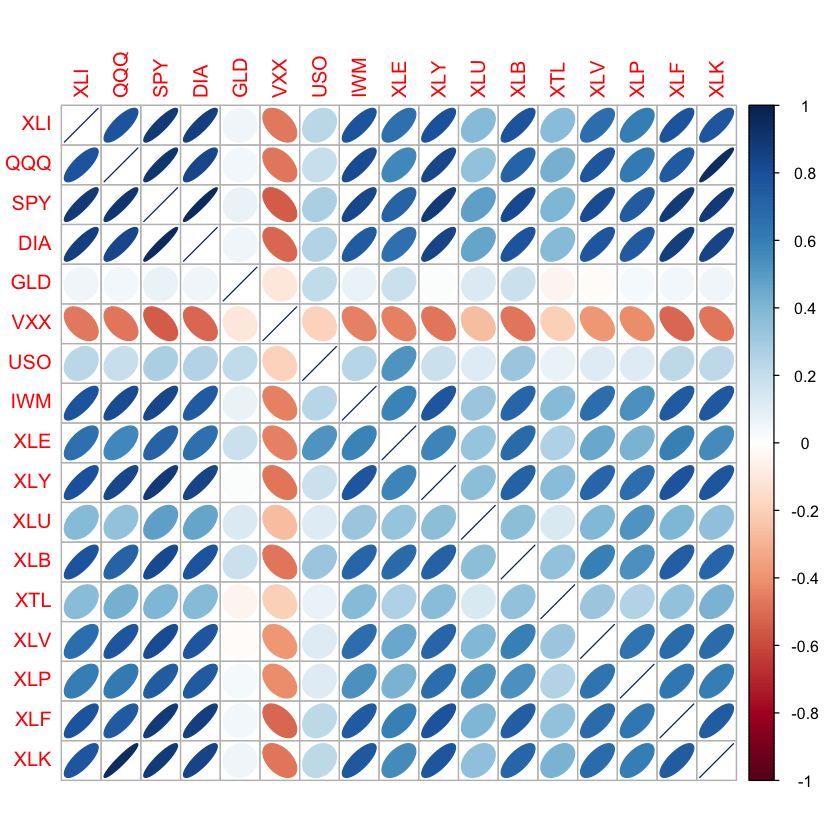

In [58]:
corrplot(cor(etfs), method="ellipse") # 상관관계 매트릭스 

In [62]:
sp500_sym[sp500_sym$sector == 'telecommunications_services', 'symbol']

[1] "T"    "CTL"  "FTR"  "VZ"   "LVLT"

In [61]:
telecom <- sp500_px[, sp500_sym[sp500_sym$sector == 'telecommunications_services', 'symbol']] # col filtering 
telecom <- telecom[row.names(telecom) > '2012-07-01',] # row filtering 

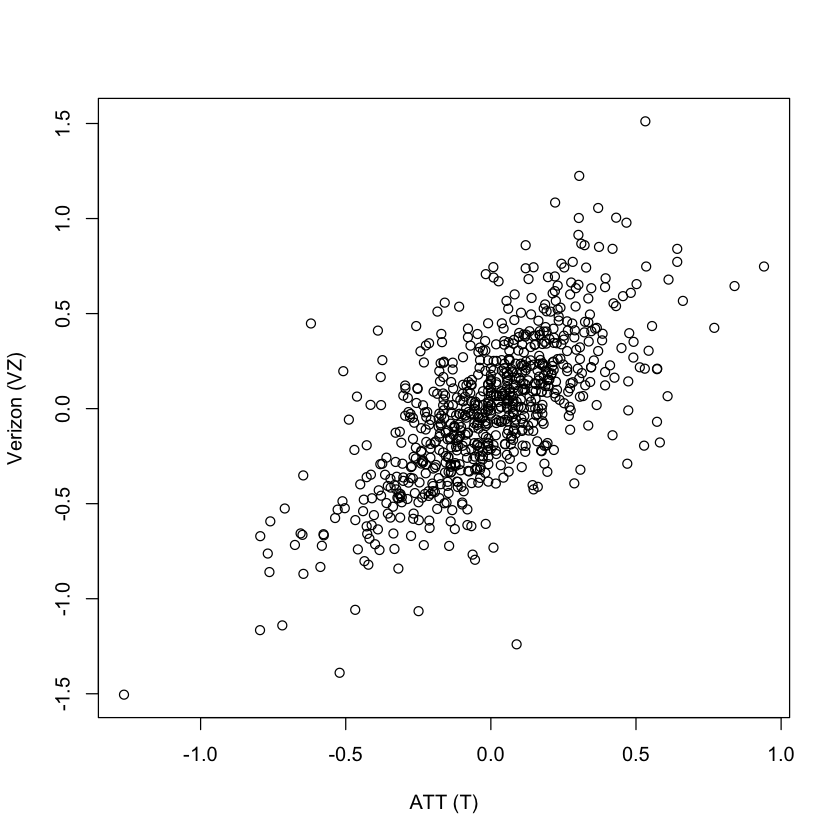

In [63]:
# 산점도
plot(telecom$T, telecom$VZ, xlab='ATT (T)', ylab='Verizon (VZ)')

## 🏘️ King County Tax

In [22]:
kc_tax <- read.csv(file.path(PSDS_PATH, 'data', 'kc_tax.csv.gz'))

In [23]:
# 극단치 제거 
kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 & 
                 SqFtTotLiving > 100 & SqFtTotLiving < 3500)

In [19]:
nrow(kc_tax0)

[1] 432693

In [1]:
R.Version()

$platform
[1] "aarch64-apple-darwin20.0.0"

$arch
[1] "aarch64"

$os
[1] "darwin20.0.0"

$system
[1] "aarch64, darwin20.0.0"

$status
[1] ""

$major
[1] "4"

$minor
[1] "1.3"

$year
[1] "2022"

$month
[1] "03"

$day
[1] "10"

$`svn rev`
[1] "81868"

$language
[1] "R"

$version.string
[1] "R version 4.1.3 (2022-03-10)"

$nickname
[1] "One Push-Up"

In [9]:
library(ggplot2)

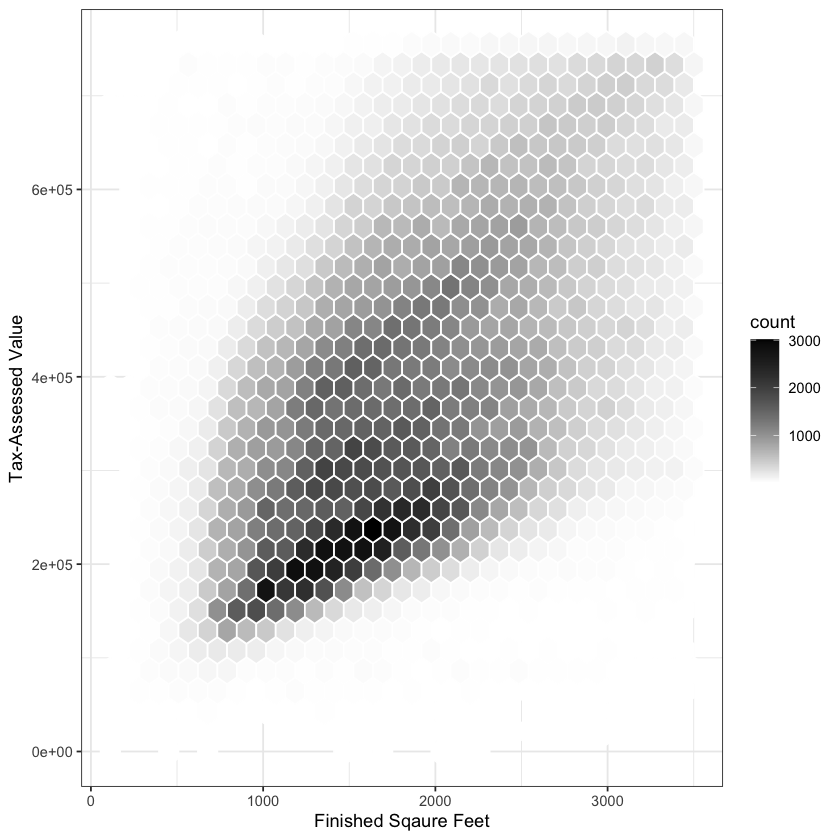

In [23]:
# hexagonal binning
## aes: 미적 매핑 설정 - 데이터의 변수를 시각적 요소로 매핑하기 위한 함수
## stat_binhex(color='white'): 육각형 빈 구현 - 육각형 빈을 생성하고 테두리를 흰색으로 설정합니다.
## scale_fill_gradient(low='white', high='black'): 그라데이션 채우기 설정 
ggplot(kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))) + 
    stat_binhex(color='white') + 
    theme_bw() + 
    scale_fill_gradient(low='white', high='black') +
    labs(x='Finished Sqaure Feet', y = 'Tax-Assessed Value')

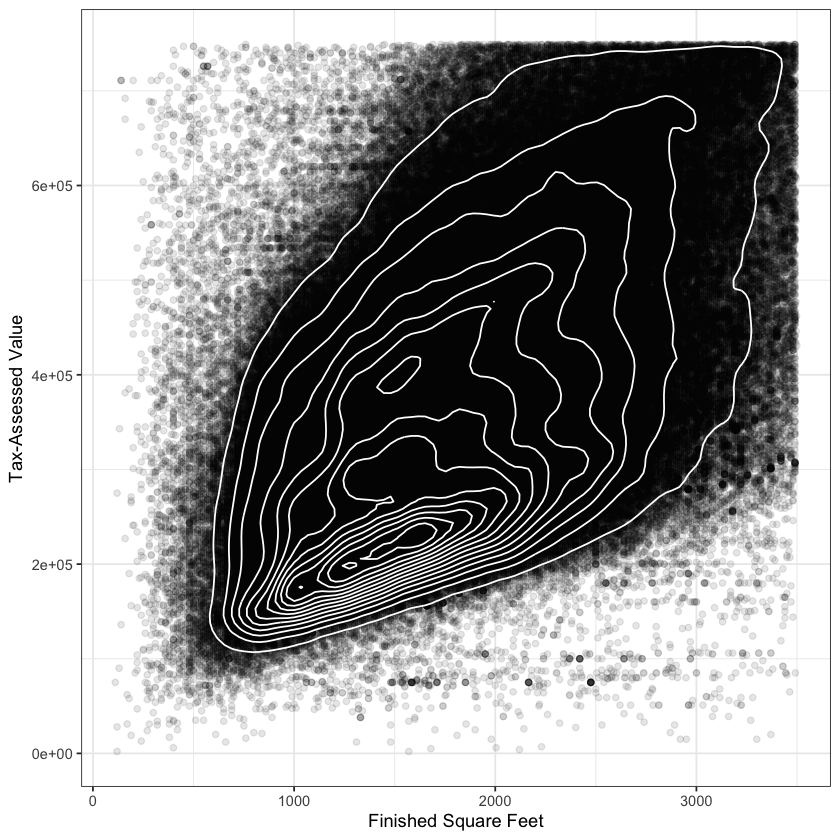

In [24]:
# contour plot 
ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
theme_bw() +
## geom_point(alpha=0.1): 투명도를 가진 점 추가 - 데이터 포인트를 점 형태로 표시하며, 투명도를 0.1로 설정하여 점들이 서로 겹칠 때 시각적으로 중첩을 줄입니다.
## geom_density2d(color='white'): 밀도 등고선 추가 - 데이터의 밀도를 등고선 형태로 표현하고, 등고선의 색상을 흰색으로 설정합니다.
geom_point(alpha=0.1) + 
geom_density2d(color='white') + 
labs(x = 'Finished Square Feet', y='Tax-Assessed Value')

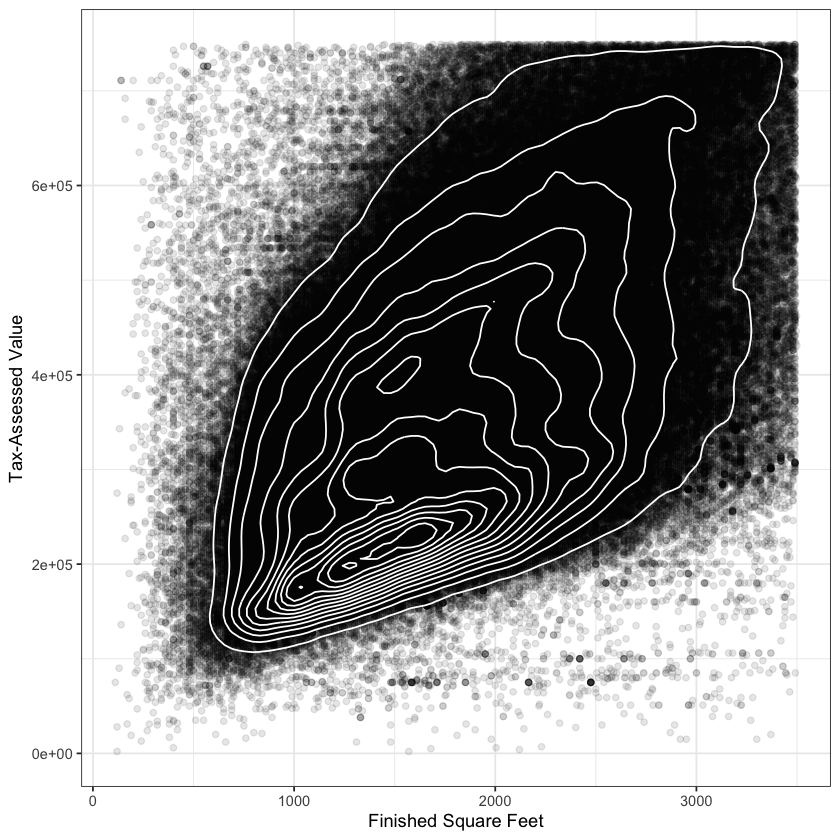

In [24]:
# contour plot 
ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
theme_bw() +
## geom_point(alpha=0.1): 투명도를 가진 점 추가 - 데이터 포인트를 점 형태로 표시하며, 투명도를 0.1로 설정하여 점들이 서로 겹칠 때 시각적으로 중첩을 줄입니다.
## geom_density2d(color='white'): 밀도 등고선 추가 - 데이터의 밀도를 등고선 형태로 표현하고, 등고선의 색상을 흰색으로 설정합니다.
geom_point(alpha=0.1) + 
geom_density2d(color='white') + 
labs(x = 'Finished Square Feet', y='Tax-Assessed Value')

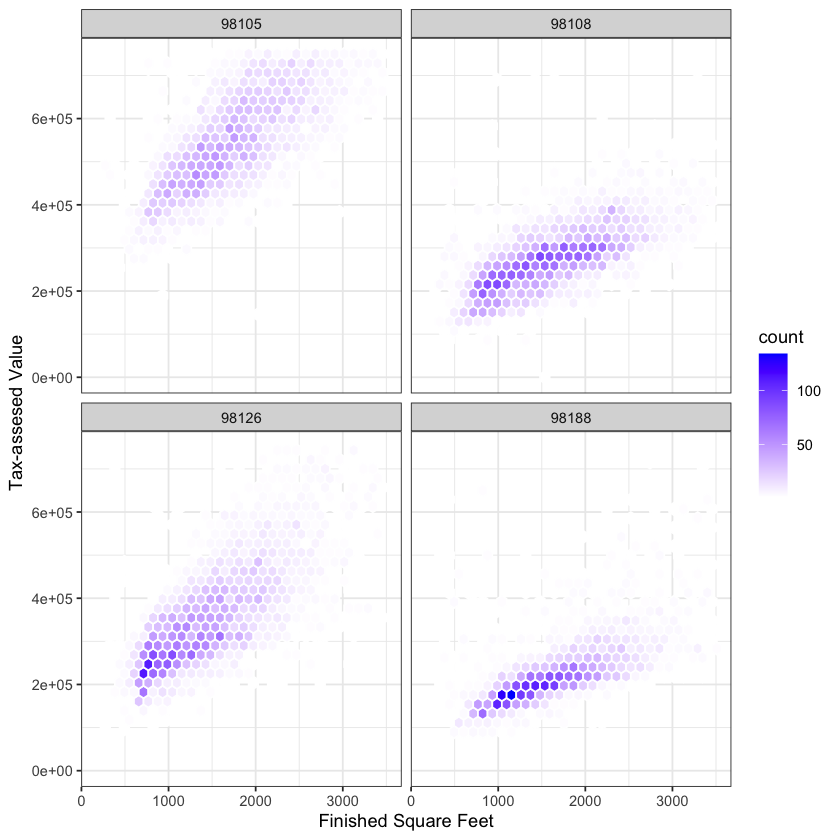

In [25]:
# conditioning 
ggplot(subset(kc_tax0, ZipCode %in% c(98188, 98105, 98108, 98126)), aes(x=SqFtTotLiving, y=TaxAssessedValue)) + 
stat_binhex(color='white') + 
theme_bw() + 
scale_fill_gradient(low='white', high='blue') + 
labs(x='Finished Square Feet', y = 'Tax-assesed Value') + 
facet_wrap('ZipCode')

## 💸 Lending Club Loans

In [3]:
install.packages('descr')

‘xtable’(들)을 또한 설치합니다.


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(descr)

In [6]:
# 범주형(신용 등급) vs. 범주형(대출 결과)
PSDS_PATH = '.'
lc_loans <- read.csv(file.path(PSDS_PATH, 'data', 'lc_loans.csv'))

In [9]:
head(lc_loans)

,status,grade
,<chr>,<chr>
1,Fully Paid,B
2,Charged Off,C
3,Fully Paid,C
4,Fully Paid,C
5,Current,B
6,Fully Paid,A


In [11]:
# 피벗 테이블 
## prop.c=FALSE: 각 열 내에서의 비율을 출력 X 
## prop.chisq=FALSE: 카이제곱 통계량에 기반한 비율을 계산하지 않음을 지정합니다. 이는 각 셀의 기대 빈도 대비 관찰 빈도의 차이를 비율로 나타내지 않겠다는 의미입니다.
## prop.t=FALSE: 전체 count (table) 대비 각 cell의 count 
## prop.r은 TRUE인 상태. 각 row 내에서의 비율을 출력  

x_tab <- CrossTable(lc_loans$grade, lc_loans$status, prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE)

In [12]:
x_tab

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  lc_loans$status
lc_loans$grade    Charged Off   Current   Fully Paid     Late    Total
----------------------------------------------------------------------
A                        1562     50051        20408      469    72490
                        0.022     0.690        0.282    0.006    0.161
----------------------------------------------------------------------
B                        5302     93852        31160     2056   132370
                        0.040     0.709        0.235    0.016    0.294
----------------------------------------------------------------------
C                        6023     88928        23147     2777   120875
                        0.050     0.736        0.191    0.023    0.268
----------------------------------------------------------------------
D                        5007     53281        13681

In [13]:
# count only 
x_tab <- CrossTable(lc_loans$grade, lc_loans$status, prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE, prop.r=FALSE)

In [14]:
x_tab

   Cell Contents 
|-------------------------|
|                       N | 
|-------------------------|

                  lc_loans$status
lc_loans$grade    Charged Off   Current   Fully Paid     Late    Total
----------------------------------------------------------------------
A                        1562     50051        20408      469    72490
----------------------------------------------------------------------
B                        5302     93852        31160     2056   132370
----------------------------------------------------------------------
C                        6023     88928        23147     2777   120875
----------------------------------------------------------------------
D                        5007     53281        13681     2308    74277
----------------------------------------------------------------------
E                        2842     24639         5949     1374    34804
----------------------------------------------------------------------
F         

## ✈️ Airline Stats

In [15]:
# 범주형(항공사) vs. 수치형(지연 비율)
# each row: 어떤 항공사 소속 비행기 한 대가 한 달 동안 어떤 항목에서 지연이 어느 정도 비율로 있었는지 
airline_stats <- read.csv(file.path(PSDS_PATH, 'data', 'airline_stats.csv'), stringsAsFactors = FALSE)

In [19]:
head(airline_stats)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
,<dbl>,<dbl>,<dbl>,<chr>
1,8.153226,1.971774,0.7620968,American
2,5.959924,3.706107,1.5858779,American
3,7.157270,2.706231,2.0267062,American
4,12.100000,11.033333,0.0000000,American
5,7.333333,3.365591,1.7741935,American
6,6.163889,3.225000,0.9750000,American


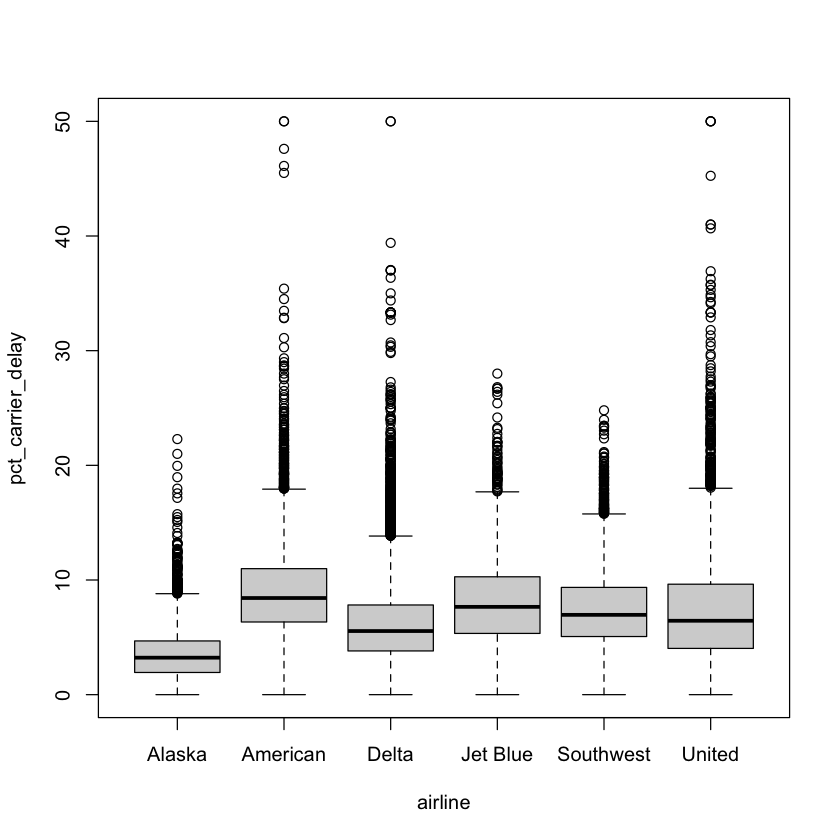

In [16]:
# box plot
boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0, 50))

Warning message:
“Removed 38 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


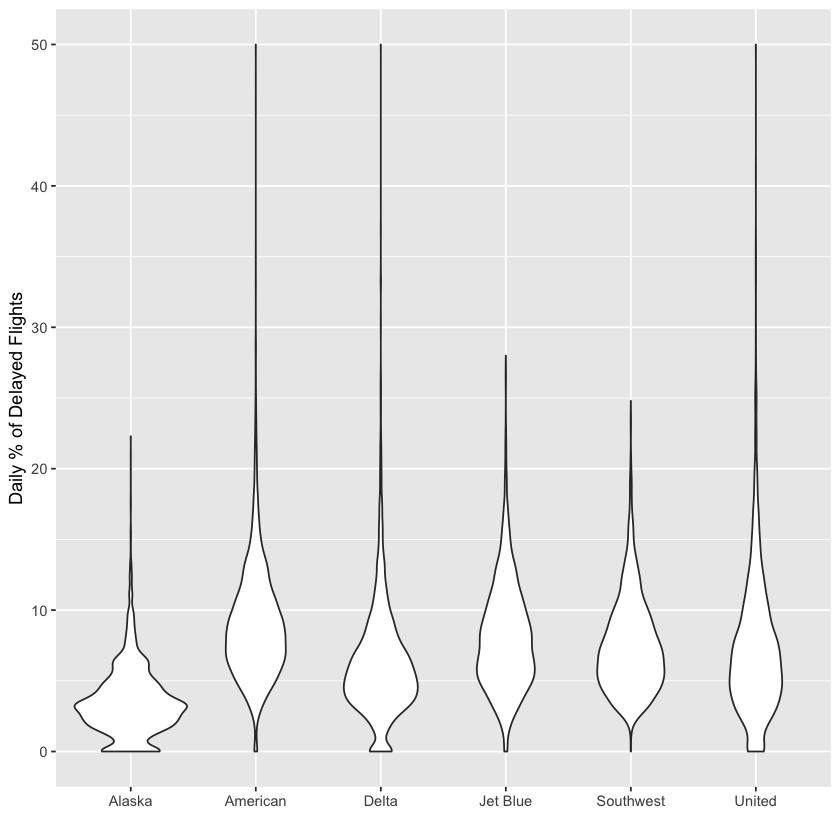

In [20]:
# violin plot
library(ggplot2)
ggplot(data=airline_stats, aes(airline, pct_carrier_delay)) + ylim(0, 50) + geom_violin() + labs(x='', y='Daily % of Delayed Flights')